# Reseaux de neurones Artificiels

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join("RNA_Perceptron", "images")

def save_fig(fig_id, tight_layout=True, images_path=IMAGES_PATH):
    if not os.path.isdir(images_path):
        os.makedirs(images_path)
    path = os.path.join(images_path, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) # setosa ?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Programmes\Anaconda\envs\ngtv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [3]:
y_pred

array([1])

C:\Programmes\Anaconda\envs\ngtv\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


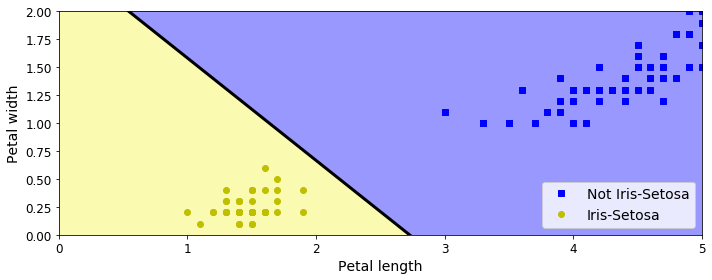

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Entrainement d'un PMC sur MNIST

## Construction du réseau de neuronnes profond:  
*- 2 couches cachés avec 300 et 100 neurones*  
*- 1 couche de sortie Softmax*

*Pour éviter les doublons*

In [5]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

*Récupération des données MNIST*

In [6]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

**Récupération du jeu d'entrainement et de test**

## Avec une API haut niveau: DNNClassifier

In [8]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmprkxg21fj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024B08ED6550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for upd

INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 1.2032723, step = 6000 (0.265 sec)
INFO:tensorflow:global_step/sec: 376.943
INFO:tensorflow:loss = 0.85099185, step = 6100 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.535
INFO:tensorflow:loss = 1.0084448, step = 6200 (0.265 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 1.1383494, step = 6300 (0.265 sec)
INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 0.2112895, step = 6400 (0.267 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 4.139609, step = 6500 (0.265 sec)
INFO:tensorflow:global_step/sec: 332.011
INFO:tensorflow:loss = 1.270326, step = 6600 (0.302 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.28203654, step = 6700 (0.275 sec)
INFO:tensorflow:global_step/sec: 374.131
INFO:tensorflow:loss = 0.9227988, step = 6800 (0.267 sec)
INFO:tensorflow:global_step/sec: 375.535
INFO:tensorflow:loss = 0.25714785, step = 6900 (0.266 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.106147215, step = 14200 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.10409328, step = 14300 (0.267 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.27233598, step = 14400 (0.265 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.10012336, step = 14500 (0.267 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.111928, step = 14600 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.801
INFO:tensorflow:loss = 0.2535882, step = 14700 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.532
INFO:tensorflow:loss = 0.04665164, step = 14800 (0.265 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.5188913, step = 14900 (0.265 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.19931373, step = 15000 (0.269 sec)
INFO:tensorflow:global_step/sec: 378.366
INFO:tensorflow:loss = 0.07584366, step = 15100 (0.26

INFO:tensorflow:global_step/sec: 374.131
INFO:tensorflow:loss = 0.04677262, step = 22300 (0.267 sec)
INFO:tensorflow:global_step/sec: 378.369
INFO:tensorflow:loss = 0.19028032, step = 22400 (0.264 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.09018608, step = 22500 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.051553264, step = 22600 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.06740004, step = 22700 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.06517602, step = 22800 (0.266 sec)
INFO:tensorflow:global_step/sec: 376.944
INFO:tensorflow:loss = 0.059226587, step = 22900 (0.265 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.16848886, step = 23000 (0.266 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.022283994, step = 23100 (0.267 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.0140510425, step = 232

INFO:tensorflow:global_step/sec: 309.466
INFO:tensorflow:loss = 0.015812565, step = 30400 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.202
INFO:tensorflow:loss = 0.027933652, step = 30500 (0.332 sec)
INFO:tensorflow:global_step/sec: 316.3
INFO:tensorflow:loss = 0.004055548, step = 30600 (0.317 sec)
INFO:tensorflow:global_step/sec: 302.011
INFO:tensorflow:loss = 0.014465667, step = 30700 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.515
INFO:tensorflow:loss = 0.018186554, step = 30800 (0.324 sec)
INFO:tensorflow:global_step/sec: 314.317
INFO:tensorflow:loss = 0.006797303, step = 30900 (0.318 sec)
INFO:tensorflow:global_step/sec: 324.489
INFO:tensorflow:loss = 0.025829483, step = 31000 (0.308 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 0.045313265, step = 31100 (0.369 sec)
INFO:tensorflow:global_step/sec: 286.479
INFO:tensorflow:loss = 0.06845217, step = 31200 (0.348 sec)
INFO:tensorflow:global_step/sec: 288.954
INFO:tensorflow:loss = 0.02646902, step = 31

INFO:tensorflow:global_step/sec: 359.381
INFO:tensorflow:loss = 0.014024877, step = 38500 (0.278 sec)
INFO:tensorflow:global_step/sec: 355.557
INFO:tensorflow:loss = 0.038844857, step = 38600 (0.281 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 0.026166523, step = 38700 (0.281 sec)
INFO:tensorflow:global_step/sec: 350.586
INFO:tensorflow:loss = 0.006088621, step = 38800 (0.284 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 0.042028088, step = 38900 (0.280 sec)
INFO:tensorflow:global_step/sec: 359.382
INFO:tensorflow:loss = 0.00639456, step = 39000 (0.278 sec)
INFO:tensorflow:global_step/sec: 354.3
INFO:tensorflow:loss = 0.03997608, step = 39100 (0.283 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.001925181, step = 39200 (0.280 sec)
INFO:tensorflow:global_step/sec: 355.558
INFO:tensorflow:loss = 0.013645309, step = 39300 (0.281 sec)
INFO:tensorflow:global_step/sec: 355.558
INFO:tensorflow:loss = 0.0019014158, step = 3

**Résultat sur le jeu de test**

In [9]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-08-08:14:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmprkxg21fj\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-08-08:14:38
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9804, average_loss = 0.10328443, global_step = 44000, loss = 13.073979
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\User\AppData\Local\Temp\tmprkxg21fj\model.ckpt-44000


**Précision :**

In [10]:
eval_results

{'accuracy': 0.9804,
 'average_loss': 0.10328443,
 'loss': 13.073979,
 'global_step': 44000}

**Prédiction :**

In [11]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmprkxg21fj\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -3.8036153,  -3.4456737,   2.2024376,   8.134204 ,  -6.7298393,
         -7.4591064, -20.347912 ,  27.689035 ,  -1.3801037,   4.3190436],
       dtype=float32),
 'probabilities': array([2.1033688e-14, 3.0086241e-14, 8.5371224e-12, 3.2169489e-09,
        1.1273838e-15, 5.4369679e-16, 1.3734664e-21, 1.0000000e+00,
        2.3737400e-13, 7.0882945e-11], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

## Avec l'API de base (et une fonction par couche de neurones: dense)

## 1_ Phase de Construction

### ______ Model du réseaux de neurones ______

**Ajout du nbr d'entrée,de sortie, de neurones par couches cachés**

In [34]:
import tensorflow as tf

n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

**Ajout noeud de substitutions avec None car on ne connais pas la taille des lots**

In [35]:
reset_graph()

# Noeud de substitution pour les données d'entrainements
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") # None car on ne sait pas combien d'instances (batch_size?)
y = tf.placeholder(tf.int64, shape=(None), name="y") # Noeud de substitution pour les cibles

**Ajout des couches : d'entré, cachés et de sortie dans une portée de nom "dnn"**

In [36]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

### ______ Fonction de Coût ______

**Définition de la fonction de coût: ici cross entropy croisé en mode sparse<br>
Ajout d'un summary pour tracker sur Tensorboard**

In [37]:
with tf.name_scope("loss"): # portée de nom pour TB
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss) # summary du loss pourTB

### ______ Optimiseur ______

**Ajout de l'optimizer et learning_rate**

In [38]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

### ______ Evaluation ______

**Evaluation du modèle**

In [39]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # récupère les probas et evaluent en logits
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

**Initialisation et sauvegarde**

In [40]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

**Repectoire pour le tensorboard**

In [41]:
from datetime import datetime

#Fonction définissant un préfixe pour retrouver facilement le log
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tensorBoard_summary"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [42]:
logdir = log_dir("mnist_PMC")

**Génération du journal TensorBoard**

In [43]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

## 2_Phase d'exécution

**Définition du nombre d'époque et de mini lot**

In [44]:
n_epochs = 40
batch_size = 50

In [45]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch # yield permet de retourner des valeurs qui ne seront lu qu'une fois

**Lancement de l'entrainement**

In [46]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "saver_node/2_MNIST_PMC_my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9024
1 Batch accuracy: 0.92 Val accuracy: 0.9254
2 Batch accuracy: 0.94 Val accuracy: 0.9372
3 Batch accuracy: 0.9 Val accuracy: 0.9416
4 Batch accuracy: 0.94 Val accuracy: 0.9472
5 Batch accuracy: 0.94 Val accuracy: 0.9514
6 Batch accuracy: 1.0 Val accuracy: 0.9548
7 Batch accuracy: 0.94 Val accuracy: 0.961
8 Batch accuracy: 0.96 Val accuracy: 0.9622
9 Batch accuracy: 0.94 Val accuracy: 0.9648
10 Batch accuracy: 0.92 Val accuracy: 0.9656
11 Batch accuracy: 0.98 Val accuracy: 0.9668
12 Batch accuracy: 0.98 Val accuracy: 0.9686
13 Batch accuracy: 0.98 Val accuracy: 0.9704
14 Batch accuracy: 1.0 Val accuracy: 0.9696
15 Batch accuracy: 0.94 Val accuracy: 0.9718
16 Batch accuracy: 0.98 Val accuracy: 0.9726
17 Batch accuracy: 1.0 Val accuracy: 0.9728
18 Batch accuracy: 0.98 Val accuracy: 0.9748
19 Batch accuracy: 0.96 Val accuracy: 0.9756
20 Batch accuracy: 1.0 Val accuracy: 0.9748
21 Batch accuracy: 1.0 Val accuracy: 0.9734
22 Batch accuracy: 0.96 Val 

**Prédiction sur les 20 premiers chiffres**

In [47]:
with tf.Session() as sess:
    saver.restore(sess, "saver_node/2_MNIST_PMC_my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from saver_node/2_MNIST_PMC_my_model_final.ckpt


*Résultat:*

In [48]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [49]:
file_writer.close()

# Deep MLP sur the MNIST

In [38]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [39]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [40]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [41]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [42]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [43]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [44]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [45]:
logdir = log_dir("mnist_dnn_2")

In [46]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [47]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [48]:
X_train = mnist.train.images
m, n = X_train.shape

In [49]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.440% 	Loss: 0.35228
Epoch: 5 	Validation accuracy: 95.060% 	Loss: 0.17546
Epoch: 10 	Validation accuracy: 96.700% 	Loss: 0.12551
Epoch: 15 	Validation accuracy: 97.240% 	Loss: 0.10431
Epoch: 20 	Validation accuracy: 97.580% 	Loss: 0.08917
Epoch: 25 	Validation accuracy: 97.720% 	Loss: 0.08109
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07784
Epoch: 35 	Validation accuracy: 97.940% 	Loss: 0.07087
Epoch: 40 	Validation accuracy: 97.920% 	Loss: 0.06977
Epoch: 45 	Validation accuracy: 97.880% 	Loss: 0.06774
Epoch: 50 	Validation accuracy: 98.060% 	Loss: 0.06642
Epoch: 55 	Validation accuracy: 98.100% 	Loss: 0.06636
Epoch: 60 	Validation accuracy: 98.160% 	Loss: 0.06513
Epoch: 65 	Validation accuracy: 98.100% 	Loss: 0.06587
Epoch: 70 	Validation accuracy: 98.060% 	Loss: 0.06753
Epoch: 75 	Validation accuracy: 98.140% 	Loss: 0.06702
Epoch: 80 	Validation accuracy: 98.120% 	Loss: 0.06704
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.06709
Epoch: 90 	V

In [50]:
os.remove(checkpoint_epoch_path)

In [51]:
X_test = mnist.test.images
y_test = mnist.test.labels.astype("int")
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [52]:
accuracy_val

0.979